In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 读取数据
data = pd.read_csv("dataset_reduced.csv")
data['target_class'] = pd.qcut(data['Cs'], q=10, labels=False)
X = data.drop(['Cs', 'target_class'], axis=1)
y = data['Cs']
stratify_column = data['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

# Concatenate with target variable
train_df = pd.concat([X_train, y_train], axis=1)
train_df['source'] = 'train'
test_df = pd.concat([X_test, y_test], axis=1)
test_df['source'] = 'test'

# Combine train and test dataframes
full_df = pd.concat([train_df, test_df], axis=0)
full_df = full_df.drop(['Anion'], axis=1)
full_df

,O,N,SSA,PV,RMIC,Dap,ID/IG,CD,Cs,source
567,8.80,0.93,1207.3,0.550,70.909,1.80,1.050,5.0,49.1,train
462,4.30,0.00,1655.0,0.810,71.605,1.95,1.050,1.0,64.4,train
135,8.06,0.00,1770.0,0.721,57.627,1.63,1.100,5.0,117.0,train
211,4.77,0.00,1644.0,0.960,57.083,2.34,1.060,2.0,36.5,train
616,5.12,0.00,907.9,0.680,40.000,3.00,0.890,0.5,67.8,train
...,...,...,...,...,...,...,...,...,...,...
554,7.60,3.95,1162.9,0.448,80.996,1.54,1.110,1.0,103.6,test
555,7.60,3.95,1162.9,0.448,80.996,1.54,1.110,2.0,97.7,test
384,15.55,2.61,3139.2,1.740,55.747,2.22,1.020,0.1,189.4,test
387,15.55,2.61,3139.2,1.740,55.747,2.22,1.020,1.0,126.1,test


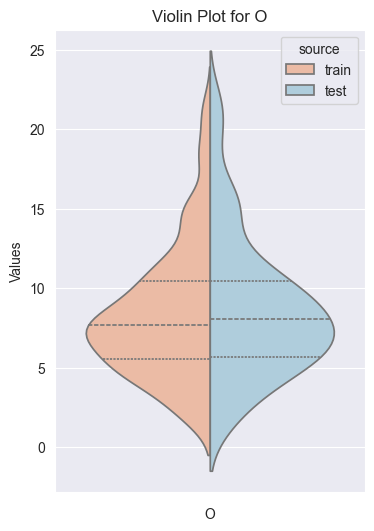

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

column = 'O'

plt.figure(figsize=(4, 6))
sns.violinplot(
    data=full_df,
    density_norm='count',
    y=column,
    hue='source',
    # hue_order=['train', 'test'],
    width=0.8,
    inner='quart',
    palette='RdBu',
    split=True,
)
plt.title(f'Violin Plot for {column}')
plt.xlabel(column)
plt.ylabel('Values')

# 保存图片
# plt.savefig(f'violin_{column}.png', bbox_inches='tight', pad_inches=0.1, transparent=False, dpi=600)

plt.show()


